# Proyek Analisis Data: Bike Sharing
- **Nama:** Valentio Stanley Gunadi
- **Email:** valentiostanley23@gmail.com
- **ID Dicoding:** tiotan

## Menentukan Pertanyaan Bisnis

- Bagaimana musim yang mempengaruhi jumlah pengguna sepeda dalam waktu terakhir 6 bulan pada tahun 2011 berdasarkan perhitungan data hari kerja/weekday?
- Bagaimana mempromosikan barang perlengkapan sepeda pada musim dingin (termasuk Fall & Winter) terjadi berdasarkan perhitungan jam yang dihasilkan dalam tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df1 = pd.read_csv("../submission/data/day.csv", delimiter=",")
df2 = pd.read_csv("../submission/data/hour.csv", delimiter=",")

print("Data Day")
df1

Data Day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
print("Data Hour")
df2

Data Hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data yang dikumpulkan dari website dicoding yang menyediakan 3 sumber data
- Membaca data day di dalam berkas CSV dengan delimiter , (koma) yang berfungsi untuk memisahkan nilai-nilai pada setiap baris, lalu kemudian menampilkan data hasil pembacaan berkas CSV.
- Membaca data hour di dalam berkas CSV dengan delimiter , (koma) yang berfungsi untuk memisahkan nilai-nilai pada setiap baris, lalu kemudian menampilkan data hasil pembacaan berkas CSV.

### Assessing Data

In [4]:
# print("Jumlah Missing Values pada data day\n")
# print(df1.isnull().sum())
# print("Jumlah Missing Values pada data hour\n")
# print(df2.isnull().sum())

print("Jumlah Missing Values pada data day")
display(df1.isna().sum())
print("Jumlah Missing Values pada data hour")
display(df2.isna().sum())

print("Jumlah Duplikasi pada data day")
display(df1.duplicated().sum())
print("Jumlah Duplikasi pada data hour")
display(df2.duplicated().sum())

Jumlah Missing Values pada data day


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values pada data hour


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi pada data day


0

Jumlah Duplikasi pada data hour


0

In [5]:
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

In [6]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan hasil kode program mengukur data day, tidak ada missing values maupun duplicates, penjelasan informasi mengenai tipe data pada setiap kolom dengan perhitungan banyaknya null, serta tidak ada inaccurate values.
- Berdasarkan hasil kode program mengukur data hour, tidak ada missing values maupun duplicates dan penjelasan informasi mengenai tipe data pada setiap kolom dengan perhitungan banyaknya null, serta tidak ada inaccurate values.
- Dapat disimpulkan bahwa data day dan hour tidak memiliki missing values, duplicates, inaccurate values karena tidak terdapat keanehan atau anomali pada setiap kolom, sehingga tidak ada masalah. Namun, masih perlu dibersihkan di tahap Cleaning Data untuk mempermudah menganalisis datanya.

### Cleaning Data

In [8]:
df1 = pd.DataFrame(df1, columns = ("dteday","season", "weekday"))
# Memperbaiki tipe data
df1["dteday"] = pd.to_datetime(df1["dteday"], format="%Y-%m-%d")
display(df1.info())
# Mengubah nama kolom
df1 = df1.rename(columns={"dteday":"tgl_hari_krj","season":"musim_hari", "weekday": "hari_kerja"})

df2 = pd.DataFrame(df2, columns = ("dteday","season", "hr", "holiday"))
# df2 = pd.DataFrame(df2, columns = ("instant", "hr"))
df2["dteday"] = pd.to_datetime(df2["dteday"], format="%Y-%m-%d")
display(df2.info())
# Mengubah nama kolom
df2 = df2.rename(columns={"dteday":"tgl_hari_jam","season":"musim_jam", "hr":"jam", "holiday":"hari_libur"})

print("Data Day")
display(df1)
print("Data Hour")
display(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dteday   731 non-null    datetime64[ns]
 1   season   731 non-null    int64         
 2   weekday  731 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dteday   17379 non-null  datetime64[ns]
 1   season   17379 non-null  int64         
 2   hr       17379 non-null  int64         
 3   holiday  17379 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 543.2 KB


None

Data Day


,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,1,6
1,2011-01-02,1,0
2,2011-01-03,1,1
3,2011-01-04,1,2
4,2011-01-05,1,3
...,...,...,...
726,2012-12-27,1,4
727,2012-12-28,1,5
728,2012-12-29,1,6
729,2012-12-30,1,0


Data Hour


,tgl_hari_jam,musim_jam,jam,hari_libur
0,2011-01-01,1,0,0
1,2011-01-01,1,1,0
2,2011-01-01,1,2,0
3,2011-01-01,1,3,0
4,2011-01-01,1,4,0
...,...,...,...,...
17374,2012-12-31,1,19,0
17375,2012-12-31,1,20,0
17376,2012-12-31,1,21,0
17377,2012-12-31,1,22,0


**Insight:**
- Memilih kolom tertentu pada data day menggunakan kode program ini untuk memperoleh kolom tertentu langsung tanpa menghapus kolom secara manual, mengubah data tipe pada kolom yang terdapat object menjadi datetime untuk mem-filter/membagikan rentang waktu mulai dari 2011-01-01 sampai 2011-06-30 atau terhitung durasi 6 bulan pada tahun 2011, lalu kemudian mengubah beberapa nama kolomnya juga untuk mudah memahami sembari mengamati data pada tahap analisis data.
- Memilih kolom tertentu pada data jam menggunakan kode program ini untuk memperoleh kolom tertentu langsung tanpa menghapus kolom secara manual, dan mengubah data tipe pada kolom yang terdapat object menjadi datetime, lalu kemudian mengubah beberapa nama kolomnya juga untuk mudah memahami sembari mengamati data pada tahap analisis data

## Exploratory Data Analysis (EDA)

### Define questions for Explore Data

- Bagaimana musim yang mempengaruhi jumlah pengguna sepeda dalam waktu terakhir 6 bulan pada tahun 2011 berdasarkan perhitungan data hari kerja/weekday?
- Bagaimana mempromosikan penyewaan sepeda pada musim dingin (termasuk Fall & Winter) terjadi berdasarkan perhitungan jam yang dihasilkan dalam tahun terakhir?

### Explore statistic parameter from data

#### Explore Data Day

In [9]:
df1_season = df1.groupby(by="musim_hari")
display(df1_season.describe())

tgl_hari_krj                                                      \
                  count                           mean                  min   
musim_hari                                                                    
1                   181  2011-09-19 16:26:31.160220928  2011-01-01 00:00:00   
2                   184            2011-11-04 12:00:00  2011-03-21 00:00:00   
3                   188            2012-02-05 12:00:00  2011-06-21 00:00:00   
4                   178            2012-05-07 00:00:00  2011-09-23 00:00:00   

                                                                           \
                            25%                  50%                  75%   
musim_hari                                                                  
1           2011-02-15 00:00:00  2012-01-01 00:00:00  2012-02-15 00:00:00   
2           2011-05-05 18:00:00  2011-11-04 12:00:00  2012-05-05 06:00:00   
3           2011-08-06 18:00:00  2012-02-05 12:00:00  2012-08-06 06:00:00   
4           2011-11-06 06:00:00  2012-05-07 00:00:00  2012-11-05 18:00:00   

                                     hari_kerja                                \
                            max  std      count      mean  min  25%  50%  75%   
musim_hari                                                                      
1           2012-12-31 00:00:00  NaN      181.0  3.000000  0.0  1.0  3.0  5.0   
2           2012-06-20 00:00:00  NaN      184.0  2.989130  0.0  1.0  3.0  5.0   
3           2012-09-22 00:00:00  NaN      188.0  3.031915  0.0  1.0  3.0  5.0   
4           2012-12-20 00:00:00  NaN      178.0  2.966292  0.0  1.0  3.0  5.0   

                           
            max       std  
musim_hari                 
1           6.0  2.033060  
2           6.0  1.999970  
3           6.0  1.994389  
4           6.0  2.008172

In [10]:
display(df1.describe())

,tgl_hari_krj,musim_hari,hari_kerja
count,731,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2.997264
min,2011-01-01 00:00:00,1.000000,0.000000
25%,2011-07-02 12:00:00,2.000000,1.000000
50%,2012-01-01 00:00:00,3.000000,3.000000
75%,2012-07-01 12:00:00,3.000000,5.000000
max,2012-12-31 00:00:00,4.000000,6.000000
std,NaN,1.110807,2.004787


array([[<Axes: title={'center': 'tgl_hari_krj'}>,
        <Axes: title={'center': 'musim_hari'}>],
       [<Axes: title={'center': 'hari_kerja'}>, <Axes: >]], dtype=object)

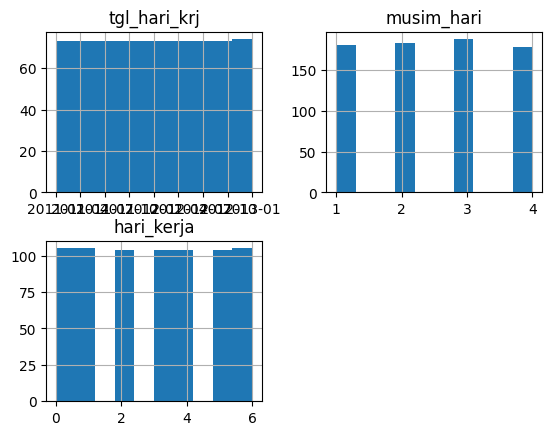

In [11]:
df1.hist()

In [12]:
df1.corr()

,tgl_hari_krj,musim_hari,hari_kerja
tgl_hari_krj,1.000000,0.412224,-0.000016
musim_hari,0.412224,1.000000,-0.003080
hari_kerja,-0.000016,-0.003080,1.000000


In [13]:
df1

,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,1,6
1,2011-01-02,1,0
2,2011-01-03,1,1
3,2011-01-04,1,2
4,2011-01-05,1,3
...,...,...,...
726,2012-12-27,1,4
727,2012-12-28,1,5
728,2012-12-29,1,6
729,2012-12-30,1,0


#### Data Hour

In [14]:
display(df2.groupby(by="jam").describe())

tgl_hari_jam                                                      \
           count                           mean                  min   
jam                                                                    
0            726  2012-01-02 03:12:23.801652736  2011-01-01 00:00:00   
1            724  2012-01-01 21:08:57.016574464  2011-01-01 00:00:00   
2            715  2012-01-04 22:31:23.076923136  2011-01-01 00:00:00   
3            697  2012-01-07 23:37:16.441893888  2011-01-01 00:00:00   
4            697  2012-01-10 23:33:08.522238208  2011-01-01 00:00:00   
5            717  2012-01-05 07:29:52.468619264  2011-01-01 00:00:00   
6            725  2012-01-01 18:00:29.793103360  2011-01-01 00:00:00   
7            727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
8            727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
9            727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
10           727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
11           727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
12           728  2011-12-31 15:13:50.769230848  2011-01-01 00:00:00   
13           729  2012-01-01 01:13:05.185185280  2011-01-01 00:00:00   
14           729  2012-01-01 01:13:05.185185280  2011-01-01 00:00:00   
15           729  2012-01-01 01:13:05.185185280  2011-01-01 00:00:00   
16           730  2011-12-31 14:04:16.438356224  2011-01-01 00:00:00   
17           730  2011-12-31 14:04:16.438356224  2011-01-01 00:00:00   
18           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
19           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
20           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
21           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
22           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
23           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   

                                                                    \
                     25%                  50%                  75%   
jam                                                                  
0    2011-07-04 06:00:00  2012-01-02 12:00:00  2012-07-01 18:00:00   
1    2011-07-03 18:00:00  2012-01-02 12:00:00  2012-07-01 06:00:00   
2    2011-07-08 12:00:00  2012-01-06 00:00:00  2012-07-03 12:00:00   
3    2011-07-13 00:00:00  2012-01-08 00:00:00  2012-07-05 00:00:00   
4    2011-07-19 00:00:00  2012-01-12 00:00:00  2012-07-07 00:00:00   
5    2011-07-10 00:00:00  2012-01-06 00:00:00  2012-07-03 00:00:00   
6    2011-07-04 00:00:00  2012-01-02 00:00:00  2012-07-01 00:00:00   
7    2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
8    2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
9    2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
10   2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
11   2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
12   2011-07-02 18:00:00  2011-12-31 12:00:00  2012-06-30 06:00:00   
13   2011-07-03 00:00:00  2012-01-01 00:00:00  2012-07-01 00:00:00   
14   2011-07-03 00:00:00  2012-01-01 00:00:00  2012-07-01 00:00:00   
15   2011-07-03 00:00:00  2012-01-01 00:00:00  2012-07-01 00:00:00   
16   2011-07-02 06:00:00  2011-12-31 12:00:00  2012-06-30 18:00:00   
17   2011-07-02 06:00:00  2011-12-31 12:00:00  2012-06-30 18:00:00   
18   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
19   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
20   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
21   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
22   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
23   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   

                              musim_jam            ...                 \
                     max  std     count      mean  ...  max       std   
jam                   

In [15]:
df2.describe()

,tgl_hari_jam,musim_jam,jam,hari_libur
count,17379,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,11.546752,0.028770
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000
25%,2011-07-04 00:00:00,2.000000,6.000000,0.000000
50%,2012-01-02 00:00:00,3.000000,12.000000,0.000000
75%,2012-07-02 00:00:00,3.000000,18.000000,0.000000
max,2012-12-31 00:00:00,4.000000,23.000000,1.000000
std,NaN,1.106918,6.914405,0.167165


array([[<Axes: title={'center': 'tgl_hari_jam'}>,
        <Axes: title={'center': 'musim_jam'}>],
       [<Axes: title={'center': 'jam'}>,
        <Axes: title={'center': 'hari_libur'}>]], dtype=object)

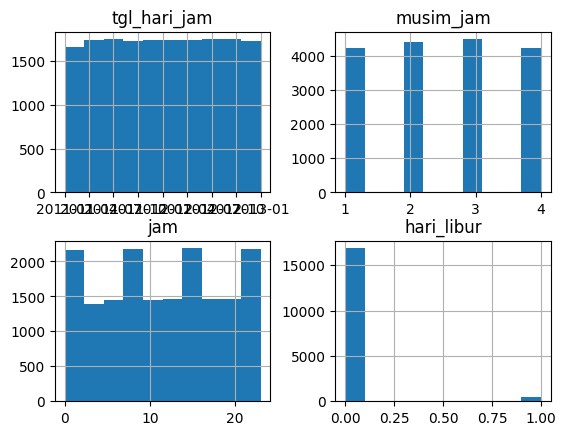

In [16]:
df2.hist()

In [17]:
df2.corr()

,tgl_hari_jam,musim_jam,jam,hari_libur
tgl_hari_jam,1.000000,0.404452,-0.006161,0.014737
musim_jam,0.404452,1.000000,-0.006117,-0.009585
jam,-0.006161,-0.006117,1.000000,0.000479
hari_libur,0.014737,-0.009585,0.000479,1.000000


### Explore all data


#### Menghubungkan semua data


In [18]:
main_data = pd.concat([df1, df2], ignore_index=True)
display(main_data)

,tgl_hari_krj,musim_hari,hari_kerja,tgl_hari_jam,musim_jam,jam,hari_libur
0,2011-01-01,1.0,6.0,NaT,NaN,NaN,NaN
1,2011-01-02,1.0,0.0,NaT,NaN,NaN,NaN
2,2011-01-03,1.0,1.0,NaT,NaN,NaN,NaN
3,2011-01-04,1.0,2.0,NaT,NaN,NaN,NaN
4,2011-01-05,1.0,3.0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18105,NaT,NaN,NaN,2012-12-31,1.0,19.0,0.0
18106,NaT,NaN,NaN,2012-12-31,1.0,20.0,0.0
18107,NaT,NaN,NaN,2012-12-31,1.0,21.0,0.0
18108,NaT,NaN,NaN,2012-12-31,1.0,22.0,0.0


In [19]:
main_df = pd.DataFrame(main_data)
display(main_df)

,tgl_hari_krj,musim_hari,hari_kerja,tgl_hari_jam,musim_jam,jam,hari_libur
0,2011-01-01,1.0,6.0,NaT,NaN,NaN,NaN
1,2011-01-02,1.0,0.0,NaT,NaN,NaN,NaN
2,2011-01-03,1.0,1.0,NaT,NaN,NaN,NaN
3,2011-01-04,1.0,2.0,NaT,NaN,NaN,NaN
4,2011-01-05,1.0,3.0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18105,NaT,NaN,NaN,2012-12-31,1.0,19.0,0.0
18106,NaT,NaN,NaN,2012-12-31,1.0,20.0,0.0
18107,NaT,NaN,NaN,2012-12-31,1.0,21.0,0.0
18108,NaT,NaN,NaN,2012-12-31,1.0,22.0,0.0


#### Mengeksplorasi semua data untuk visualisasi yang menjawab pertanyaan bisnis

In [20]:
df1 = main_df[['tgl_hari_krj','musim_hari', 'hari_kerja']].dropna(axis=0, ignore_index=True)
df2 = main_df[['tgl_hari_jam','musim_jam', 'jam']].dropna(axis=0, ignore_index=True)
df3 = main_df[['tgl_hari_jam','musim_jam', 'hari_libur']].dropna(axis=0, ignore_index=True)
display(df1)
display(df2)
display(df3)

,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,1.0,6.0
1,2011-01-02,1.0,0.0
2,2011-01-03,1.0,1.0
3,2011-01-04,1.0,2.0
4,2011-01-05,1.0,3.0
...,...,...,...
726,2012-12-27,1.0,4.0
727,2012-12-28,1.0,5.0
728,2012-12-29,1.0,6.0
729,2012-12-30,1.0,0.0


,tgl_hari_jam,musim_jam,jam
0,2011-01-01,1.0,0.0
1,2011-01-01,1.0,1.0
2,2011-01-01,1.0,2.0
3,2011-01-01,1.0,3.0
4,2011-01-01,1.0,4.0
...,...,...,...
17374,2012-12-31,1.0,19.0
17375,2012-12-31,1.0,20.0
17376,2012-12-31,1.0,21.0
17377,2012-12-31,1.0,22.0


,tgl_hari_jam,musim_jam,hari_libur
0,2011-01-01,1.0,0.0
1,2011-01-01,1.0,0.0
2,2011-01-01,1.0,0.0
3,2011-01-01,1.0,0.0
4,2011-01-01,1.0,0.0
...,...,...,...
17374,2012-12-31,1.0,0.0
17375,2012-12-31,1.0,0.0
17376,2012-12-31,1.0,0.0
17377,2012-12-31,1.0,0.0


#### Memfilter rentang waktu berdasarkan ketentuan tujuan bisnis nomor pertama yang mengarahkan ke 6 bulan terakhir pada tahun 2011

In [21]:
# df1 = df1[(df1["tgl_hari_krj"] >= "2011-01-01") & (df1["tgl_hari_krj"] <= "2011-06-30")]
start_date, end_date = (df1["tgl_hari_krj"].min()),(df1["tgl_hari_krj"].min() + pd.DateOffset(months=6))
df1 = df1[(df1["tgl_hari_krj"] >= start_date) & (df1["tgl_hari_krj"] <= end_date)]
df1.musim_hari = df1.musim_hari.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
group_df1 = df1.groupby(by=["musim_hari","hari_kerja"]).agg({"musim_hari":"count"}).rename(columns={'musim_hari': 'jml_musim_hari'}).reset_index()
group_df1

,musim_hari,hari_kerja,jml_musim_hari
0,Fall,0.0,1
1,Fall,1.0,1
2,Fall,2.0,2
3,Fall,3.0,2
4,Fall,4.0,2
5,Fall,5.0,2
6,Fall,6.0,1
7,Springer,0.0,12
8,Springer,1.0,11
9,Springer,2.0,11


In [22]:
byseason_df1 = pd.merge(left=df1, right=group_df1, on=["musim_hari","hari_kerja"], how="right")
byseason_df1

,tgl_hari_krj,musim_hari,hari_kerja,jml_musim_hari
0,2011-06-26,Fall,0.0,1
1,2011-06-27,Fall,1.0,1
2,2011-06-21,Fall,2.0,2
3,2011-06-28,Fall,2.0,2
4,2011-06-22,Fall,3.0,2
...,...,...,...,...
177,2011-05-21,Summer,6.0,13
178,2011-05-28,Summer,6.0,13
179,2011-06-04,Summer,6.0,13
180,2011-06-11,Summer,6.0,13


#### Memfilter musim tertentu berdasarkan ketentuan tujuan bisnis nomor pertama yang mengarahkan ke musim dingin, termasuk Fall & Winter

In [23]:
df2.musim_jam = df2.musim_jam.replace({3: "Fall", 4: "Winter"})
display(df2)
group_df2 = df2.groupby(by=["musim_jam","jam"]).agg({"musim_jam":"count"}).rename(columns={'musim_jam': 'jml_musim_jam'}).reset_index()
display(group_df2)
loc_df2 = group_df2.loc[(group_df2.musim_jam=="Fall") | (group_df2.musim_jam=="Winter")].reset_index(drop=True)
display(loc_df2)

,tgl_hari_jam,musim_jam,jam
0,2011-01-01,1.0,0.0
1,2011-01-01,1.0,1.0
2,2011-01-01,1.0,2.0
3,2011-01-01,1.0,3.0
4,2011-01-01,1.0,4.0
...,...,...,...
17374,2012-12-31,1.0,19.0
17375,2012-12-31,1.0,20.0
17376,2012-12-31,1.0,21.0
17377,2012-12-31,1.0,22.0


,musim_jam,jam,jml_musim_jam
0,1.0,0.0,178
1,1.0,1.0,178
2,1.0,2.0,170
3,1.0,3.0,156
4,1.0,4.0,154
...,...,...,...
91,Winter,19.0,177
92,Winter,20.0,177
93,Winter,21.0,177
94,Winter,22.0,177


,musim_jam,jam,jml_musim_jam
0,Fall,0.0,187
1,Fall,1.0,186
2,Fall,2.0,186
3,Fall,3.0,186
4,Fall,4.0,187
5,Fall,5.0,187
6,Fall,6.0,187
7,Fall,7.0,188
8,Fall,8.0,188
9,Fall,9.0,188


In [24]:
byseason_df2= pd.merge(left=df2, right=loc_df2, on=["musim_jam","jam"], how="right")
byseason_df2

,tgl_hari_jam,musim_jam,jam,jml_musim_jam
0,2011-06-21,Fall,0.0,187
1,2011-06-22,Fall,0.0,187
2,2011-06-23,Fall,0.0,187
3,2011-06-24,Fall,0.0,187
4,2011-06-25,Fall,0.0,187
...,...,...,...,...
8723,2012-12-16,Winter,23.0,177
8724,2012-12-17,Winter,23.0,177
8725,2012-12-18,Winter,23.0,177
8726,2012-12-19,Winter,23.0,177


### Extra: Menghitung banyak libur pada berbagai jenis musim

In [25]:
df3.musim_jam = df3.musim_jam.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
df3 = df3.rename(columns={"tgl_hari_jam":"tgl_hari_libur","musim_jam":"musim_libur"})
group_df3 = df3.groupby(by=["musim_libur"]).agg({"hari_libur":"sum"}).rename(columns={'hari_libur': 'jumlah_libur'}).reset_index()
group_df3

,musim_libur,jumlah_libur
0,Fall,96.0
1,Springer,164.0
2,Summer,96.0
3,Winter,144.0


In [26]:
byseason_df3 = pd.merge(left=df3, right=group_df3, on=["musim_libur"], how="right")
byseason_df3

,tgl_hari_libur,musim_libur,hari_libur,jumlah_libur
0,2011-06-21,Fall,0.0,96.0
1,2011-06-21,Fall,0.0,96.0
2,2011-06-21,Fall,0.0,96.0
3,2011-06-21,Fall,0.0,96.0
4,2011-06-21,Fall,0.0,96.0
...,...,...,...,...
17374,2012-12-20,Winter,0.0,144.0
17375,2012-12-20,Winter,0.0,144.0
17376,2012-12-20,Winter,0.0,144.0
17377,2012-12-20,Winter,0.0,144.0


### Generate CSV File for dashboard

In [27]:
main_data.to_csv("dashboard/main_data.csv", index=False)

In [28]:
main_data = pd.read_csv(r'dashboard\main_data.csv')
main_df = pd.DataFrame(main_data)
display(main_df)

,tgl_hari_krj,musim_hari,hari_kerja,tgl_hari_jam,musim_jam,jam,hari_libur
0,2011-01-01,1.0,6.0,NaN,NaN,NaN,NaN
1,2011-01-02,1.0,0.0,NaN,NaN,NaN,NaN
2,2011-01-03,1.0,1.0,NaN,NaN,NaN,NaN
3,2011-01-04,1.0,2.0,NaN,NaN,NaN,NaN
4,2011-01-05,1.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18105,NaN,NaN,NaN,2012-12-31,1.0,19.0,0.0
18106,NaN,NaN,NaN,2012-12-31,1.0,20.0,0.0
18107,NaN,NaN,NaN,2012-12-31,1.0,21.0,0.0
18108,NaN,NaN,NaN,2012-12-31,1.0,22.0,0.0


In [29]:
# all_df = pd.merge(
#     left=df1,
#     right=df2,
#     how="right",
#     left_on="instant",
#     right_on="instant"
# )
# all_df

# all_df.season = all_df.season.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
# group_season = all_df.groupby(by=["season","weekday"]).agg({"season":"count"}).rename(columns={'season': 'jml_season'}).reset_index()
# group_season

# group_hour = all_df.groupby(by=["season","hr"]).agg({"season":"count"}).rename(columns={'season': 'jml_season_jam'}).reset_index()
# loc_df2 = group_hour.loc[(group_hour.season=="Fall") | (group_hour.season=="Winter")].reset_index(drop=True)
# group_hour2= pd.merge(left=group_hour, right=loc_df2, on=["season","hr"], how="right")
# group_hour2

# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x="season", 
#     y="weekday", 
#     data=group_season.sort_values(by="jml_season", ascending=True))
# plt.title("Frekuensi varian musim pada weekday 6 bulan tahun 2011", loc="center", fontsize=18)
# plt.xticks(fontsize=10)
# plt.ylabel("Hari Kerja")
# plt.xlabel("Varian Musim")

# plt.show()

# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x="season", 
#     y="hr",
#     data=byseason_df2.sort_values(by="jml_season_jam_x", ascending=True))
# plt.title("Frekuensi varian musim pada weekday 6 bulan tahun 2011", loc="center", fontsize=18)
# plt.xticks(fontsize=10)
# plt.ylabel("Hari Kerja")
# plt.xlabel("Varian Musim")
# plt.show()

# all_df.to_csv("dashboard/cek_data.csv", index=False)

**Insight:**
- Menghitung dan mengukur dataset day berbentuk statistika menggunakan parameter statistika program. Selain ini, menggabungkan semua data untuk menghasilkan file baru berupa CSV dan juga dilanjutkan dengan mengeksplorasi semua data untuk visualisasi seperti menjumlahkan data berbagai musim dengan filter rentang waktu pada setiap hari ke dalam kelompoknya. 
- Menghitung dan mengukur dataset hour berbentuk statistika menggunakan parameter statistika program. Selain ini, menggabungkan semua data untuk menghasilkan file baru berupa CSV dan juga dilanjutkan dengan mengeksplorasi semua data untuk visualisasi seperti menjumlahkan data musim dingin (termasuk Fall & Winter) pada setiap jam ke dalam kelompoknya.
- Extra dimaksudkan mengeksplorasi data tambahan yang tidak mengarahkan ke pertanyaan bisnis namun menjadi berguna untuk mengeksplorasi dan memanipulasi data untuk visualisasi tambahan di dashboard

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana musim yang mempengaruhi jumlah pengguna sepeda dalam waktu terakhir 6 bulan pada tahun 2011 berdasarkan perhitungan data hari kerja/weekday?

In [30]:
df1

,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,Springer,6.0
1,2011-01-02,Springer,0.0
2,2011-01-03,Springer,1.0
3,2011-01-04,Springer,2.0
4,2011-01-05,Springer,3.0
...,...,...,...
177,2011-06-27,Fall,1.0
178,2011-06-28,Fall,2.0
179,2011-06-29,Fall,3.0
180,2011-06-30,Fall,4.0


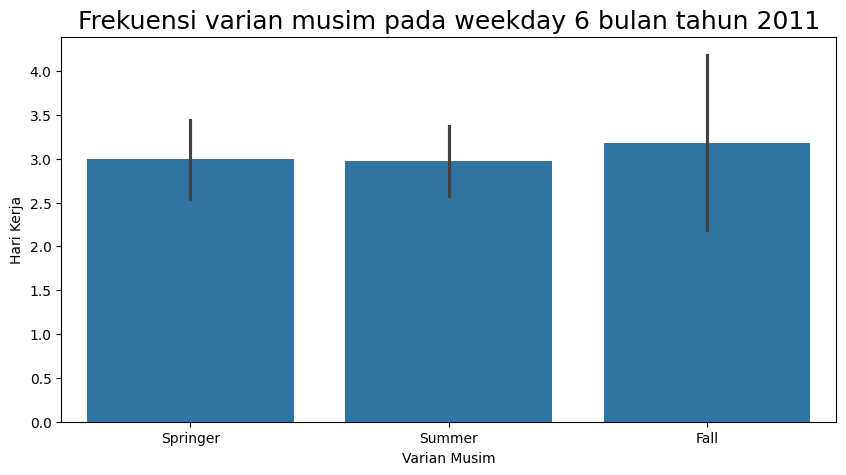

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="musim_hari", 
    y="hari_kerja", 
    data=byseason_df1.sort_values(by="tgl_hari_krj", ascending=True))
plt.title("Frekuensi varian musim pada weekday 6 bulan tahun 2011", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Hari Kerja")
plt.xlabel("Varian Musim")
plt.show()

### Pertanyaan 2: Bagaimana mempromosikan barang perlengkapan sepeda pada musim dingin (termasuk Fall & Winter) terjadi berdasarkan perhitungan jam yang dihasilkan dalam tahun terakhir?


In [32]:
display(df2['jam'].unique())
display(set(df2['jam']))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0}

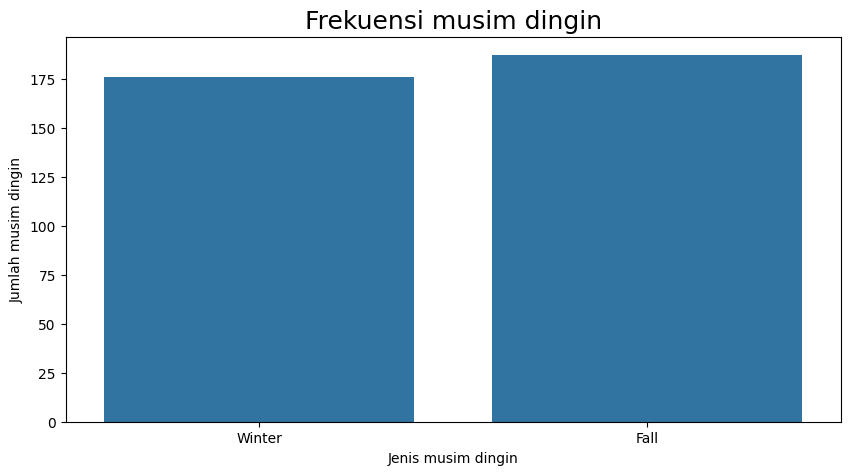

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="musim_jam", 
    y="jml_musim_jam", 
    data=byseason_df2.sort_values(by="jml_musim_jam", ascending=True)
    )
plt.title("Frekuensi musim dingin", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Jumlah musim dingin")
plt.xlabel("Jenis musim dingin")
plt.show()

### Extra Visualisasi

#### Menggunakan data hour untuk mengeksplorasi data tambahan yang tidak mengarahkan ke target pertanyaan bisnis

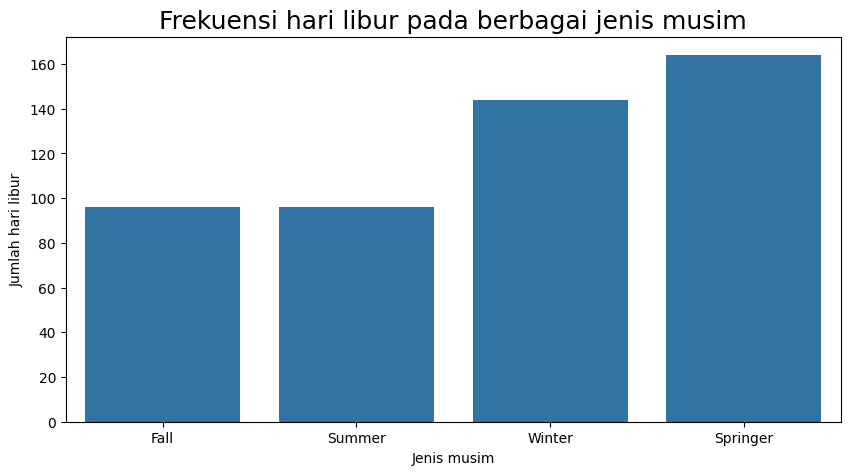

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="musim_libur", 
    y="jumlah_libur", 
    data=group_df3.sort_values(by="jumlah_libur", ascending=True)
    )
plt.title("Frekuensi hari libur pada berbagai jenis musim", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Jumlah hari libur")
plt.xlabel("Jenis musim")
plt.show()

**Insight:**
- Merancang visualisasi mengenai frekuensi varian musim pada weekday dengan 6 bulan terakhir tahun 2011 berdasarkan hasil perhitungan data hari kerja/weekday yang dilakukan oleh penjumlahan musim pada setiap hari kerja dengan filter 6 bulan tahun 2011 ke dalam kelompok musim hari alias jumlah musimnya, di mana visualiasi dirancangkan berbentuk bar dengan label x berbagai jenis musim dan label y kelompok hari kerja.
- Merancang visualisasi mengenai frekuensi musim dingin yang paling sering muncul berdasarkan hasil perhitungan jam yang dilakukan oleh penjumlahan musim pada setiap jam secara menyeluruh alias tahun terakhir, di mana visualiasinya dirancangkan berbentuk bar plot dengan label x jenis musim dingin termasuk Winter dan Fall, dan label y jumlah musim dingin.
- Merancang visualisasi tambahan mengenai frekuensi hari libur menggunakan data hour sebagai data tambahan yang tidak mengarahkan ke target bisnis. Namun, menjadi berguna untuk membantu pencarian data tambahan melalui dashboard, tidak hanya visualisasi yang ditargetkan akan menambahkan wawasan baru, dimana visualisasinya dirancangkan berbentuk bar plot dengan label x jenis musim, dan label y jumlah libur yang dihitungkan dari penjumlahan setiap data mengandung value 1 yang berarti libur, sedangkan yang tidak libur berarti value 0 (nol)

## Conclusion

- Kita memanfaatkan dataset untuk mengetahui visualisasi mengenai komputasi musim secara statistika. Pada proses analisis, menghitung banyaknya berbagai jenis musim pada setiap hari kerja dengan filter 6 bulan (rentang waktu mulai dari 2011-01-01 sampai 2011-06-30) tahun 2011, lalu kemudian dibagikan ke dalam kelompok musim alias jumlah musim dengan hari kerja. Jenis musim dan hari kerja dipilihkan untuk mengetahui musim dingin terjadi pada hari kerja karena ini merupakan tujuan bisnis penyewaan sepeda yang membuka pada hari kerja. Berdasarkan visualisasi dan analisis yang dihasilkan, musim Fall terhitung lebih sering muncul terjadi pada weekday ketika mengamati hasil penjumlahan musim pada setiap hari kerja. Kemungkinan besar pengguna sepeda atau pelanggan yang ingin sewa sepeda pada Fall Season (musim gugur). Maka dari ini, sebagai data analyst atau pengembang, dapat merekomendasikan kepada bisnis untuk menyiapkan penyewaan sepeda lebih banyak pada musim gugur setelah tahun baru atau sesuai dengan keputusan bisnis user, sehingga pertanyaan bisnis telah dijawabkan oleh hasil visualisasi dan analisis.

- Kita memanfaatkan dataset untuk mengetahui visualisasi mengenai komputasi secara statistika. Pada proses analisis, memilih beberapa kolom penting yang bisa menghasilkan hasil visualisasi dan analisis yang sangat signifikan karena dataset memiliki ukuran lebih besar namun terlihat lebih seimbang. Maka dari itu, saat mengolah datasetnya, memilih kolom yang dikategorikan oleh musim dingin antara musim Fall dan musim winter. Dengan pilih kolomnya, menghitung banyaknya musim dingin tersebut pada setiap jam dengan filter tahun terakhir, lalu kemudian dibentukkan ke dalam kelompok musim alias jumlah musim dengan jam. Berdasarkan visualisasi dan analisis yang dihasilkan, musim Fall paling sering muncul terjadi pada jam tertentu ketika mengamati hasil penjumlahan musim pada setiap jam. Oleh karena itu, sebagai data analyst atau pengembang merekomendasikan kepada bisnis penyewaan untuk melakukan promosi penyewaan sepeda pada musim gugur atau bisnis penyewaan dapat memasukkan hasilnya ke dalam penyusunan strategi marketingnya, sehingga visualiasi dan analisis telah dinyatakan bahwa membantu menjawab pertanyaan bisnis user.

- Extra data merupakan data tambahan yang digunakan untuk menggali pengetahuan melalui visualisasi maupun tahap analisis pada dashboard beserta dengan notebook. Extra data mungkin melebihi kebutuhan user atau audiens namun menjadi insight yang berguna mungkin akan dibutuhkan oleh user atau audiens ke depannya.

Setelah menganalisis data dengan memanfaatkan dataset, ada saran yang saya dapat berikan untuk peneliti atau pengembang yang melanjutkan project ini adalah mengeksplorasi dan menganalisis lebih lanjut seperti memilih dataset lain yang persis sama dengan dataset ini, memilih kolom pada dataset, atau menambahkan data-data di datasetnya yang cukup beda dengan dataset sebelumnya agar dapat hasil yang signifikan.